In [121]:
import os
all_entries = []
with open("window_exp_proc_lat_local") as f:
    for line in f:
        line = line.replace("{","").replace("}","")
        line = [x.split("=") for x in line.split(", ")]
        line_dict = dict()
        for pair in line:
            line_dict[pair[0]] = pair[1]
        all_entries.append(line_dict)
print(all_entries)

[{'duration': '6.685709041', 'latency': '5.779411764705882', 'name': 'localhost-windowTest100-0', 'throughput': '10.17094814970127', 'counter': '68\n'}, {'duration': '6.996858687', 'latency': '3.5774647887323945', 'name': 'localhost-windowTest100-1', 'throughput': '10.147410884818404', 'counter': '71\n'}, {'duration': '5.898870569', 'latency': '2.5833333333333335', 'name': 'localhost-windowTest100-2', 'throughput': '10.17143863357752', 'counter': '60\n'}, {'duration': '5.899417876', 'latency': '2.65', 'name': 'localhost-windowTest100-3', 'throughput': '10.170494998174629', 'counter': '60\n'}, {'duration': '5.898919484', 'latency': '2.4', 'name': 'localhost-windowTest100-4', 'throughput': '10.171354290008816', 'counter': '60\n'}, {'duration': '5.899617111', 'latency': '2.183333333333333', 'name': 'localhost-windowTest100-5', 'throughput': '10.170151532059315', 'counter': '60\n'}, {'duration': '0.899307703', 'latency': '1.5', 'name': 'localhost-windowTest100-6', 'throughput': '11.1196645

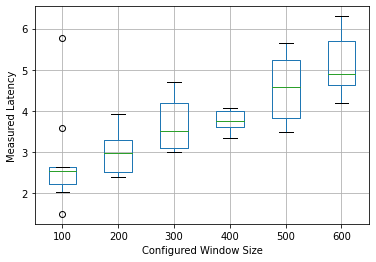

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame.from_dict(all_entries)

df[["name", "window_size", "id"]] = df.name.str.split("-", expand=True)
df.window_size = df.window_size.str.replace("windowTest", "")


df["window_size"] = df.window_size.astype(float)
df["latency"] = df.latency.astype(float)


df_new = pd.DataFrame({'100': df[df["window_size"] == 100].latency,
                      '200': df[df["window_size"] == 200].latency,
                      '300': df[df["window_size"] == 300].latency,
                    '400': df[df["window_size"] == 400].latency,
                    '500': df[df["window_size"] == 500].latency,
                     '600': df[df["window_size"] == 600].latency,
                    })

ax = df_new.boxplot(column=["100","200","300", "400", "500", "600"])
ax.set_xlabel("Configured Window Size")
ax.set_ylabel("Measured Latency")
plt.savefig("result.png")